## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this 
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can 
be reached faster than other shopping centres. We will use public transport travel times.

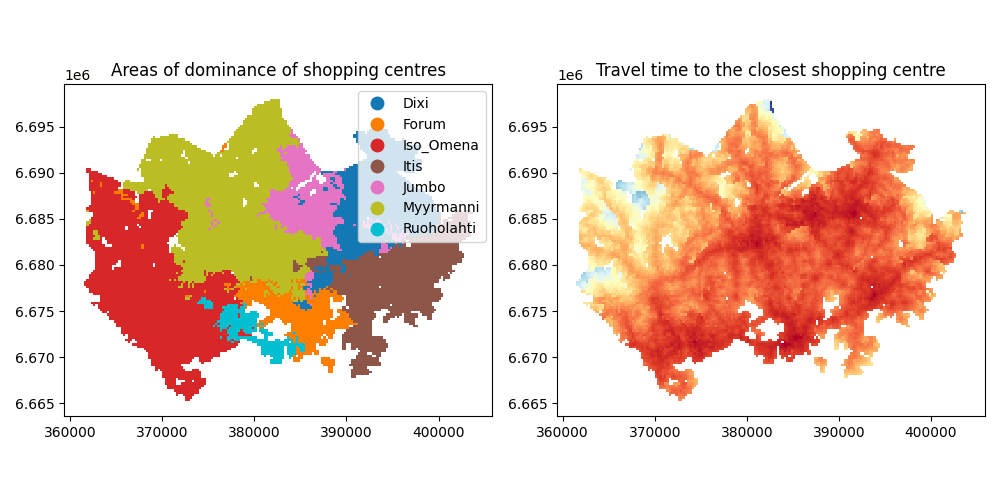

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel 
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*, 
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we 
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking. 

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them 
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files.
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column.
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this 
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell.

---


In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [2]:
# ADD YOUR OWN CODE HERE
import pandas as pd
import geopandas as gpd
import numpy as np
grid = gpd.read_file(DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg")
grid.head()

,YKR_ID,geometry
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [7]:
# ADD YOUR OWN CODE HERE

def read_travel_time_files():
    dfs = []   # List to store the DataFrames

    for input_file in DATA_DIRECTORY.glob("travel_times_to*.txt"):
        df = pd.read_csv(input_file, sep=";")
        dfs.append(df) 
       
    if dfs:  # Check if any files were read
        final_df = pd.concat(dfs, ignore_index=True)  # Combine all DataFrames
        return final_df
    else:
        return None  # Return None if no files were found or read

In [8]:
# Call the function to execute the code
travel_times = read_travel_time_files()
print(travel_times)  # Do whatever you want with the result

       from_id    to_id  walk_t  walk_d  car_r_t  car_r_d  car_m_t  car_m_d  \
0      5785640  5878070     318   22279       39    23233       34    23233   
1      5785641  5878070     281   19662       39    23444       34    23444   
2      5785642  5878070     282   19742       45    17666       41    17666   
3      5785643  5878070     286   20034       46    24695       40    24698   
4      5787544  5878070     311   21789       38    22807       33    22807   
...        ...      ...     ...     ...      ...      ...      ...      ...   
92612  6016698  5975373     317   22168       48    24685       42    24544   
92613  6016699  5975373     318   22295       50    24372       44    24231   
92614  6018252       -1      -1      -1       -1       -1       -1       -1   
92615  6018253  5975373     322   22525       49    24862       43    24721   
92616  6018254  5975373     320   22395       51    24960       45    24819   

       pt_r_t  pt_r_tt  pt_r_d  pt_m_t  pt_m_tt  pt

In [9]:
travel_times.replace({-1: np.nan}, inplace=True)
travel_times

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5878070.0,318.0,22279.0,39.0,23233.0,34.0,23233.0,101.0,131.0,24276.0,106.0,138.0,22627.0
1,5785641,5878070.0,281.0,19662.0,39.0,23444.0,34.0,23444.0,108.0,129.0,26134.0,109.0,137.0,22833.0
2,5785642,5878070.0,282.0,19742.0,45.0,17666.0,41.0,17666.0,109.0,129.0,26251.0,111.0,137.0,22951.0
3,5785643,5878070.0,286.0,20034.0,46.0,24695.0,40.0,24698.0,114.0,138.0,26544.0,115.0,141.0,23244.0
4,5787544,5878070.0,311.0,21789.0,38.0,22807.0,33.0,22807.0,98.0,115.0,25438.0,90.0,113.0,22138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92612,6016698,5975373.0,317.0,22168.0,48.0,24685.0,42.0,24544.0,52.0,70.0,24132.0,54.0,74.0,23235.0
92613,6016699,5975373.0,318.0,22295.0,50.0,24372.0,44.0,24231.0,54.0,70.0,24260.0,56.0,74.0,23362.0
92614,6018252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92615,6018253,5975373.0,322.0,22525.0,49.0,24862.0,43.0,24721.0,57.0,70.0,24490.0,59.0,74.0,23592.0


In [10]:
travel_times.car_r_t.isna().sum()

637

In [11]:
# Create a dictionary of shopping centres and to_ids
centre_ids = [5878070, 5878087, 5902043, 5944003, 5975373, 5978593, 5980260]
shopping_centres = ['Jumbo', 'Dixi', 'Myyrmanni', 'Itis', 'Forum', 'Iso_Omena' , 'Ruoholahti']

centre_dict = dict(zip(centre_ids, shopping_centres))
print(centre_dict)

{5878070: 'Jumbo', 5878087: 'Dixi', 5902043: 'Myyrmanni', 5944003: 'Itis', 5975373: 'Forum', 5978593: 'Iso_Omena', 5980260: 'Ruoholahti'}


In [12]:
for key, value in centre_dict.items():
    travel_times[f'car_r_t_{value}'] = travel_times['to_id'].apply(lambda x: travel_times.loc[travel_times['to_id'] == key, 'car_r_t'].values[0] if x == key else np.nan).astype('float64')
    travel_times[f'pt_r_t_{value}'] = travel_times['to_id'].apply(lambda x: travel_times.loc[travel_times['to_id'] == key, 'pt_r_t'].values[0] if x == key else np.nan).astype('float64')

In [13]:
travel_times.columns

Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt', 'pt_m_d',
       'car_r_t_Jumbo', 'pt_r_t_Jumbo', 'car_r_t_Dixi', 'pt_r_t_Dixi',
       'car_r_t_Myyrmanni', 'pt_r_t_Myyrmanni', 'car_r_t_Itis', 'pt_r_t_Itis',
       'car_r_t_Forum', 'pt_r_t_Forum', 'car_r_t_Iso_Omena',
       'pt_r_t_Iso_Omena', 'car_r_t_Ruoholahti', 'pt_r_t_Ruoholahti'],
      dtype='object')

In [14]:
grid.columns

Index(['YKR_ID', 'geometry'], dtype='object')

In [31]:
travel_times_grid = travel_times.merge(grid, left_on='to_id', right_on='YKR_ID')
travel_times_grid.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,...,car_r_t_Itis,pt_r_t_Itis,car_r_t_Forum,pt_r_t_Forum,car_r_t_Iso_Omena,pt_r_t_Iso_Omena,car_r_t_Ruoholahti,pt_r_t_Ruoholahti,YKR_ID,geometry
0,5785640,5878070.0,318.0,22279.0,39.0,23233.0,34.0,23233.0,101.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
1,5785641,5878070.0,281.0,19662.0,39.0,23444.0,34.0,23444.0,108.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
2,5785642,5878070.0,282.0,19742.0,45.0,17666.0,41.0,17666.0,109.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
3,5785643,5878070.0,286.0,20034.0,46.0,24695.0,40.0,24698.0,114.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
4,5787544,5878070.0,311.0,21789.0,38.0,22807.0,33.0,22807.0,98.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."


In [32]:
travel_times_grid

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,...,car_r_t_Itis,pt_r_t_Itis,car_r_t_Forum,pt_r_t_Forum,car_r_t_Iso_Omena,pt_r_t_Iso_Omena,car_r_t_Ruoholahti,pt_r_t_Ruoholahti,YKR_ID,geometry
0,5785640,5878070.0,318.0,22279.0,39.0,23233.0,34.0,23233.0,101.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
1,5785641,5878070.0,281.0,19662.0,39.0,23444.0,34.0,23444.0,108.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
2,5785642,5878070.0,282.0,19742.0,45.0,17666.0,41.0,17666.0,109.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
3,5785643,5878070.0,286.0,20034.0,46.0,24695.0,40.0,24698.0,114.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
4,5787544,5878070.0,311.0,21789.0,38.0,22807.0,33.0,22807.0,98.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5878070,"POLYGON ((387500.000 6685500.000, 387250.000 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91975,6016697,5975373.0,319.0,22313.0,46.0,24654.0,41.0,24513.0,54.0,70.0,...,NaN,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6..."
91976,6016698,5975373.0,317.0,22168.0,48.0,24685.0,42.0,24544.0,52.0,70.0,...,NaN,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6..."
91977,6016699,5975373.0,318.0,22295.0,50.0,24372.0,44.0,24231.0,54.0,70.0,...,NaN,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6..."
91978,6018253,5975373.0,322.0,22525.0,49.0,24862.0,43.0,24721.0,57.0,70.0,...,NaN,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6..."


In [37]:
travel_times_grid['dominance'] = travel_times_grid[["car_r_t_Itis","pt_r_t_Itis", "car_r_t_Forum", "pt_r_t_Forum", "car_r_t_Iso_Omena", "pt_r_t_Iso_Omena", "car_r_t_Ruoholahti", "pt_r_t_Ruoholahti"]].apply(lambda x: x[x == x.min()].index[0] if len(x[x == x.min()]) > 0 else np.nan, axis=1)


4

In [38]:
dominance = gpd.GeoDataFrame(travel_times_grid, geometry='geometry')
type(dominance)

geopandas.geodataframe.GeoDataFrame

In [39]:
dominance.tail()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,...,pt_r_t_Itis,car_r_t_Forum,pt_r_t_Forum,car_r_t_Iso_Omena,pt_r_t_Iso_Omena,car_r_t_Ruoholahti,pt_r_t_Ruoholahti,YKR_ID,geometry,dominance
91975,6016697,5975373.0,319.0,22313.0,46.0,24654.0,41.0,24513.0,54.0,70.0,...,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6...",car_r_t_Forum
91976,6016698,5975373.0,317.0,22168.0,48.0,24685.0,42.0,24544.0,52.0,70.0,...,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6...",car_r_t_Forum
91977,6016699,5975373.0,318.0,22295.0,50.0,24372.0,44.0,24231.0,54.0,70.0,...,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6...",car_r_t_Forum
91978,6018253,5975373.0,322.0,22525.0,49.0,24862.0,43.0,24721.0,57.0,70.0,...,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6...",car_r_t_Forum
91979,6018254,5975373.0,320.0,22395.0,51.0,24960.0,45.0,24819.0,55.0,70.0,...,NaN,49.0,110.0,NaN,NaN,NaN,NaN,5975373,"POLYGON ((385500.000 6672000.000, 385250.000 6...",car_r_t_Forum


In [12]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()

AssertionError: 


--- 

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself. 

- What was most difficult part? 
- Where did you get stuck? 
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below


---

## Well done!

Congratulations, you completed exercise 4. Good Job!